In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from shapely.geometry import Point
from shapely.geometry import MultiPoint
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from shapely.geometry import box
from descartes.patch import PolygonPatch
import ipywidgets as widgets
import ipywidgets.widgets.interaction
#from ipywidgets import interactive, fixed
from ipywidgets import *
import random
import pandas as pd

import re

from shapely import geometry
import pickle
import time

#from ipyparallel import Client

from shapely import affinity
from shapely.geometry import LineString
import warnings
warnings.simplefilter('ignore', np.RankWarning)


import gc
gc.enable()

In [15]:
#os.chdir('/home/charly/Lab/Projects/uJ/local/experiments/HT-AMP/')

import sys, importlib
# importlib.reload(sys.modules['DataManagers'])
importlib.reload(sys.modules['TrackingFunctions'])
#importlib.reload(sys.modules['PlottingFunctions'])
# from DataManagers import *
from TrackingFunctions import *
#from PlottingFunctions import *

TrackingFunctions... loaded!


In [3]:
pwd

'/home/esb/Projects/uJ/local/experiments/HT-Sine2hr'

In [4]:
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/charly/Lab/Projects/uJ/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')

#from readroi import *
from DataManagers import *
from DataStructs import *
from AnalysisFunctions import *
from TrackingFunctions import *
from PlottingFunctions import *


Importing readroi
DataStructs...loaded!
DataManagers...loaded!
> Analysis Functions loaded
TrackingFunctions... loaded!
PlottingFunctions... loaded!


## Experiment Parameters

In [19]:


expeLabel="HT-Sine-2hr"
rootDir="../../data_sample/HT-Sine-2hr/"
trap_list="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32".split(",")  
trap_list="xy19,xy19-1".split(",")  
trap_list="xy19".split(",")  



#data_type="relativeIntensity"
#data_type="normData"
data_type="normData"


figxlim=640
figylim=512

flims=(figxlim,figylim)

#Input files

for trap in trap_list:
    #Input files
    dirNameROIs=rootDir+"data_rois/"+trap+"/GFP/"
    #dirNameDATA=rootDir+'data/'+data_type+'/'+trap+"/"
    dirNameDATA=rootDir+'data/'+data_type+'/'+trap+"/"
    
    #Output
    dirNameCELLS=rootDir+'data_cells/'+trap+'/'+data_type+'/'
   

    dirNameTRACKEDCELLS=rootDir+'data_cells_tracked/'+trap+'/'+data_type+'/'
    


    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    if not os.path.exists(dirNameTRACKEDCELLS_IMGS):
        print("making dir figures...")
        os.makedirs(dirNameTRACKEDCELLS_IMGS)
   
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    if not os.path.exists(dirNameDATALINEAGES):
        print("making dir lineages...")
        os.makedirs(dirNameDATALINEAGES)

#toFile=False
toFile=True
    

frame2min=5

notcaptured_start=866
notcaptured_end=866


frame_experiment_start=1;
frame_signal_start=24
frame_signal_end=116
frame_experiment_end=116

t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min


frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))



#print(dataPath)
#if not os.path.exists(figurePathDM) and toFile:
#    os.mkdir(figurePathDM)




Frames:  range(1, 117)	 0.0->9.583333333333334 hours
t_experiment_start=0	(0.0h)
t_experiment_end=575	(9.583333333333334h)


### Load tracked cells

In [11]:

max_frames=-1

trap_tracked_cells=[]
for trap in trap_list:
    print(trap)
    dirNameTRACKEDCELLS=rootDir+'data_cells_tracked/'+trap+"/"+data_type+"/"
    
    tracked_cells=load_cells(dirNameTRACKEDCELLS,max_frames)
    print(len(tracked_cells))
    trap_tracked_cells.append(tracked_cells)

xy19
115: Loading HT-Sine-2hr_xy19_116.pkl
116
xy19-1
115: Loading HT-Sine-2hr_xy19_116.pkl
116


# Make the lineages

In [13]:
trap_lineages=[]
for i,trap in enumerate(trap_list):
    #if i==0: continue
    
    print(i,trap)
    tracked_cells=trap_tracked_cells[i]
    this_lineages=make_cellLineages_all(tracked_cells,frame_experiment_start)
    trap_lineages.append(this_lineages)
    print(len(this_lineages))
    

0 xy19
Making lineages of 322 cells out of 322 from frame 115 


['116.011'] 

Making lineages of 34 cells out of 322 from frame 114  - 3 10075 	 88	 87 	 59108	 94 	 89 102	 93107 	 92 	 100	 110*33 - 7 	 110	 90 	 110	 10479 	 113 6894
Making lineages of 47 cells out of 339 from frame 113 
Making lineages of 31 cells out of 328 from frame 112 
Making lineages of 34 cells out of 326 from frame 111 
Making lineages of 26 cells out of 322 from frame 110 
Making lineages of 33 cells out of 327 from frame 109 
Making lineages of 26 cells out of 321 from frame 108 
Making lineages of 39 cells out of 339 from frame 107 
Making lineages of 26 cells out of 334 from frame 106 
Making lineages of 27 cells out of 335 from frame 105 
Making lineages of 32 cells out of 334 from frame 104 
Making lineages of 22 cells out of 330 from frame 103 
Making lineages of 29 cells out of 327 from frame 102 
Making lineages of 30 cells out of 336 from frame 101 
Making lineages of 18 cells out of 322 from frame 100 
Making lineages of 33 cells out of 328 from frame 99 
Making lineages o

IndexError: list index out of range

### Export time-series

In [20]:
max_frames=frame_experiment_end-frame_experiment_start
minFrames=max_frames-16
#minFrames=40

for i,trap in enumerate(trap_list):
    print(trap)
    this_lineages=trap_lineages[i]
    dirNameDATALINEAGES=rootDir+'data/lineages/'#+trap+"/"
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_all.csv"
    save_data_lineages(this_lineages,filename)
    print(len(this_lineages),"saved!")
    analysis_lineages=get_analysis_lineages(this_lineages, frame_signal_start,frame_signal_end,"lineageID")
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_analysis.csv"
    save_data_lineages(analysis_lineages,filename)
    print(len(analysis_lineages),"saved!")
    long_lineages=get_long_lineages(this_lineages,"lineageID" ,minFrames)
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_long.csv"
    save_data_lineages(long_lineages,filename)
    print(len(long_lineages),"saved!")

xy19
Saving file ../../data_sample/HT-Sine-2hr/data/lineages/HT-Sine-2hr_xy19_lineages_all.csv
5046 saved! %%91.538  %
Saving file ../../data_sample/HT-Sine-2hr/data/lineages/HT-Sine-2hr_xy19_lineages_analysis.csv
2399 saved!  %
Saving file ../../data_sample/HT-Sine-2hr/data/lineages/HT-Sine-2hr_xy19_lineages_long.csv
43 saved!  %


../../data_sample/HT-Sine-2hr/figures/traked_cells/xy19/


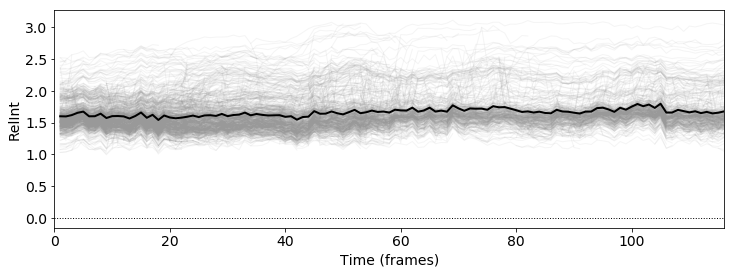

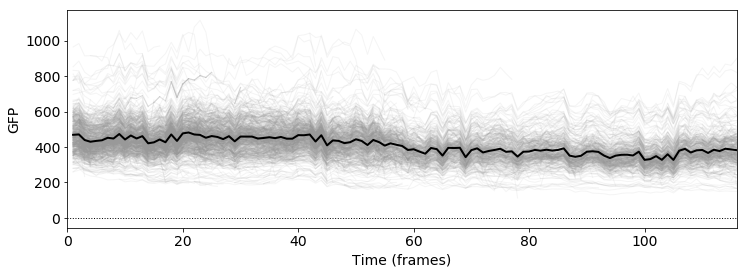

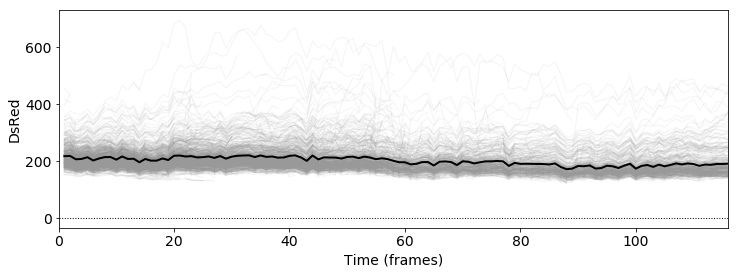

In [21]:
for i,trap in enumerate(trap_list):
    
    this_lineages=trap_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    mpl.rcParams.update({'font.size': 14})
    data_labels={'GFP','DsRed','RelInt'}
    for this_data_label in data_labels:
        fileName="%s%s_%s_timeseries_%s.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap,this_data_label)
        plot_cells_data(this_lineages, this_data_label, fileName)
        plt.show()







../../data_sample/HT-Sine-2hr/figures/traked_cells/xy19/


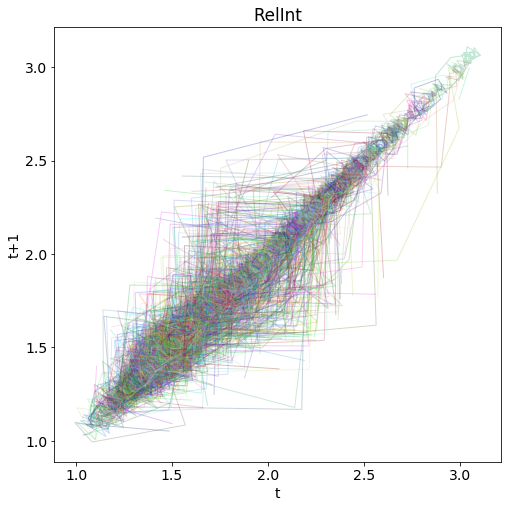

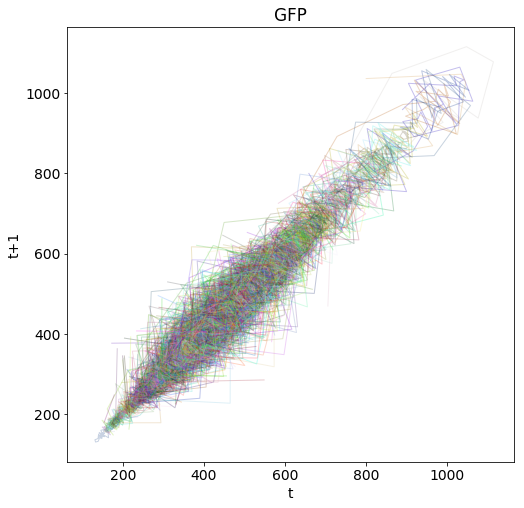

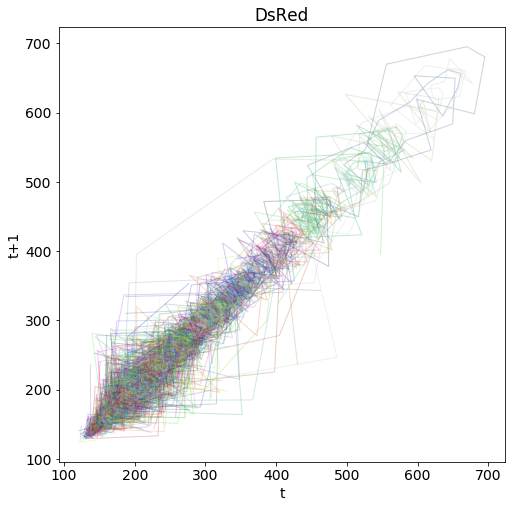

In [22]:
   

    
mpl.rcParams.update({'font.size': 14})
data_labels={'RelInt'} #'GFP','DsRed',
data_labels={'GFP','DsRed','RelInt'}
for i,trap in enumerate(trap_list):
    #print(trap)
    this_lineages=trap_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    #data_labels={'GFP','DsRed'}
    for this_data_label in data_labels:
        fileName="%s%s_%s_poincare_%s.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap,this_data_label)
        plot_cells_poincare(this_lineages, this_data_label, fileName)
        plt.show()    

### Export Horizon Plots

In [24]:

minFrames=100


num_levels=4




for i,trap in enumerate(trap_list):
    #print(trap)
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    
    this_lineages=trap_lineages[i]
    
    long_lineages=get_long_lineages(this_lineages,"lineageID" ,minFrames)
    #long_lineages=get_analysis_lineages(this_lineages, frame_signal_start,frame_experiment_end,frame_experiment_start)
    #long_lineages=this_lineages
    print(len(long_lineages))
    fileName="%s%s_%s_horizons.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap)
    print(fileName)
    plot_relativeIntensity_Horizon(long_lineages, num_levels, fileName)
    plt.close()

../../data_sample/HT-Sine-2hr/figures/traked_cells/xy19/
42
../../data_sample/HT-Sine-2hr/figures/traked_cells/xy19/HT-Sine-2hr_xy19_horizons.png


## Load Data & Plot layer

In [ ]:
def load_data_lineages(fileName):
    #df_lineages = pd.read_csv(fileName,dtype=object)
    df_lineages = pd.read_csv(fileName)
    print('Loading %s lineages from %s'%(len(df_lineages.lineageID.unique()), fileName))
    return df_lineages


In [25]:
trap_df_lineages=[]
trap_df_lineages_long=[]
for i,trap in enumerate(trap_list):
    #cell_lineages=trap_lineages[i]
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    
    lineagesDataFile='%s%s_%s_lineages_all.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages=load_data_lineages(lineagesDataFile)
    trap_df_lineages.append(df_lineages)
    list_frames=df_lineages.frame.unique()
    lineagesDataFile='%s%s_%s_lineages_analysis.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages_long=load_data_lineages(lineagesDataFile)
    trap_df_lineages_long.append(df_lineages_long)

Loading 566 lineages from ../../data_sample/HT-Sine-2hr/data/lineages/HT-Sine-2hr_xy19_lineages_all.csv
Loading 34 lineages from ../../data_sample/HT-Sine-2hr/data/lineages/HT-Sine-2hr_xy19_lineages_analysis.csv


### Draw ROIs + Data Overlay (export to PNG)  

112.516 1115.146
121.117 695.188
51598


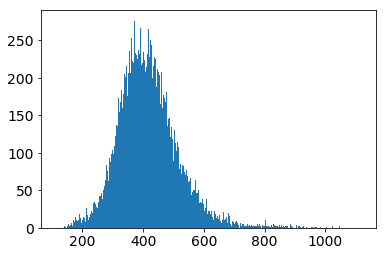

51598


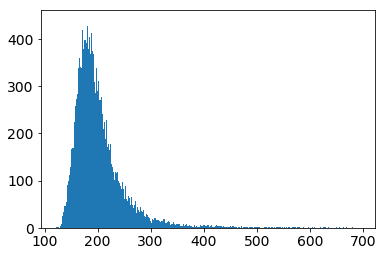

In [26]:
all_df_lineages=pd.concat(trap_df_lineages)
maxg=all_df_lineages["GFP"].max()
ming=all_df_lineages["GFP"].min()
maxr=all_df_lineages["DsRed"].max()
minr=all_df_lineages["DsRed"].min()
print(ming,maxg)
print(minr,maxr)
gb=np.linspace(float(ming),float(maxg),1000)
#gs=[float(x) for x in all_df_lineages["GFP"]]
gs=list(all_df_lineages["GFP"])
print(len(gs))
plt.hist(gs,bins=gb)

plt.show()
rb=np.linspace(float(minr),float(maxr),1000)
rs=list(all_df_lineages["DsRed"])
print(len(rs))
plt.hist(rs,bins=rb)

plt.show()



In [27]:
layer1 = {'channel':'GFP',  'minvalue':100, 'maxvalue':800, 'contour':True}
layer2 = {'channel':'DsRed','minvalue':100,'maxvalue':400,'contour':True}
layer3 = {'channel':'Mask','minvalue':100,'maxvalue':500,'contour':True}
layer4 = {'channel':'RelInt','minvalue':-.15,'maxvalue':np.pi+.15,'contour':True}
layer5 = {'channel':'Tracking','minvalue':0,'maxvalue':0,'contour':True}
layer6 = {'channel':'division','minvalue':0,'maxvalue':1,'contour':True}
layers=[layer1, layer2, layer3, layer4, layer5, layer6]
#layers=[layer4]

for i,trap in enumerate(trap_list[0:1]):
    cell_lineages=trap_lineages[i]
    df_lineages=trap_df_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    #print(df_lineages.head())
    for layer in layers:
        print("Exporting layer %s"%(layer['channel']))
        dirNameIMAGEOVERLAY=dirNameTRACKEDCELLS_IMGS+layer['channel']+'/'
        if not os.path.exists(dirNameIMAGEOVERLAY):
            os.makedirs(dirNameIMAGEOVERLAY)

        for this_frame in list_frames:
            print(this_frame,end="\r")
            [trackIDs, trackPolys, trackData]=get_data_roi(cell_lineages, df_lineages, this_frame,layer['channel'])
            #print(trackIDs, "\n\t",trackData)
           
            fileNameIMAGEOVERLAY="%s/%s_%s_%s.png"%(dirNameIMAGEOVERLAY,expeLabel,trap,str(this_frame).zfill(3))

            draw_channel(this_frame, layer, trackIDs, trackPolys, trackData, fileNameIMAGEOVERLAY,flims)
            
        print()

../../data_sample/HT-Sine-2hr/figures/traked_cells/xy19/
Exporting layer GFP
116
Exporting layer DsRed
116
Exporting layer Mask
116
Exporting layer RelInt
116
Exporting layer Tracking
116
Exporting layer division
116


In [25]:
list_frames2=list_frames[-3:]
list_frames2

array([863, 864, 865])